<a href="https://colab.research.google.com/github/llpamies/models/blob/main/organization/hex_holder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

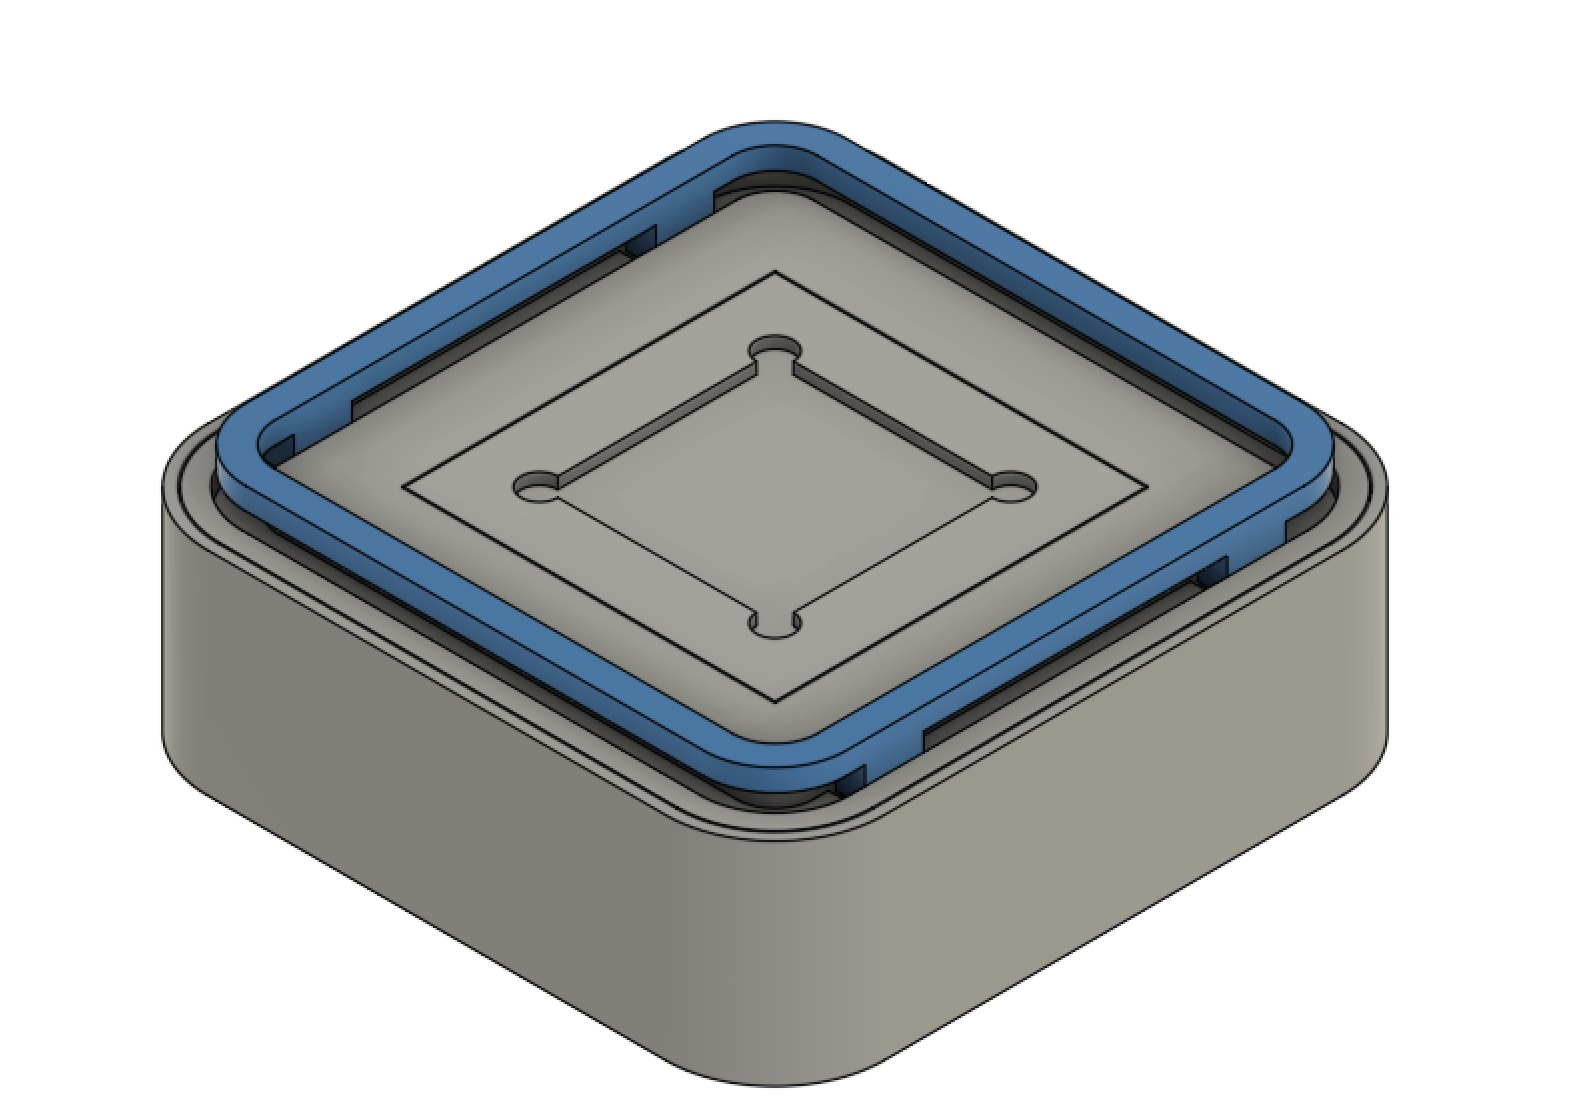
# <b>3d-printable box to assist getting solder paste printing with a frameless solder stencil.</b>
---

### This box is NOT open source. It is public domain. Which means it has zero restrictions. Just like Moby Dick, the book.

##### Liscence: WTFPL (Do What The Fuck You Want To Public License)
##### https://en.wikipedia.org/wiki/WTFPL
---

## If you print this. Take a picture and tag me in social media, and make a vacuum joke. For some reason its just always funny, even this one. "@mariusheier , this box really sucks"

#### You can also tag me without a joke.

---
### Youtube: https://www.youtube.com/channel/UCBwv2X8VB-e_v-cXobZD7QA
### Instagram: https://instagram.com/mariusheier
### Twitter: https://twitter.com/mariusheier
### Twitch.tv: https://twitch.tv/mariusrh
### Discord: https://discord.gg/QcCkfbkp3S

## Read this first

1.   Read this notebook from top to bottom
2.   Before you download the parts, you need to generate the parts that is custom to your application. Vacuum cleaner adapter, and pcb holder
3.   The parts is generated by this Notebook, because it can run code.
4.   Measure your vacuum cleaners outside diameter input it below
5.   Measure the length of the shortest side of your stencil. If both sides are equal length, you know what to do.
6.   Measure the size of your circuit board
7.   If you run into problems, there is a troubleshooting guide at the end of this Notebook
8.   Click the play buttons below where it says *"<-- (click this)"* to start the code stuff. Its gonna print alot of text.

This Notebook might only work properly with Google Chrome and Firefox.

Link to all stls if you dont want to use this Notebook.
https://drive.google.com/file/d/139us_HxxQzUpa-9mUH4-6ORd7AWbDWDX/view?usp=sharing

Link to Fusion F3D version of the box (no vacuum adapter)
https://drive.google.com/file/d/18Eb_cu4Pya7xpXknyMJo6JxwBMU55z7D/view?usp=sharing

# Lets start by installing all the software we need to generate the parts.



In [ ]:
#@title <-- (click this) Install all the software this notebook need. Then hit restart runtime like it says
# First we install openscad
!sudo add-apt-repository ppa:openscad/releases -y
!sudo apt-get update
!sudo apt-get install openscad
# Now we install Viewscad

!pip install viewscad

In [ ]:
#@title <-- (click this) Did you remember to restart runtime? Setting up the software and downloading the non generated parts


# Lets import the stuff we need

from google.colab import files
import viewscad

# And download the other parts
!gdown --id 1VRXIDXU5IkXjLvCMs_IkgA50r5rOir-p
!gdown --id 1BGy1HDb5ggILt2slrMlcVL0Gj9C25Sid
!gdown --id 1mnSUkEBbq3-DAKR0-gRqIhwi31y_trh8
!gdown --id 1bwwPlzM7YtwUyNdSpLWygqcCL-1Z2LbV

# Setup some stuff
r = viewscad.Renderer()

# Now we can generate the parts with the software we installed in our Notebook. Generate first, and then download at the end step

In [ ]:
#@title <-- (click this) Generate vacuum nozzle adapter (mm)

diameter = '32'#@param {type:"string"}
stencil_length_if_over_100mm = '100'#@param {type:"string"}
pressfit_clearance = '0.2'#@param {type:"string"}
stencil_clearance = str(int(stencil_length_if_over_100mm)-90)
vacuum_adapter = """shell_thickness = 4;
flange_width = 60.6;
flange_t= 2.1;
height = 23;
width = 50.6;
pressfit_clearance = $pressift_clearance;
nozzle = $nozzle_diameter+pressfit_clearance;
nozzle_outer = nozzle+shell_thickness;
stencil_clearance = $stencil_clearance;

difference(){
    hull(){
        cube([height,width,15], true);
        translate([(nozzle_outer-height)/2,0,15])
        cylinder(d=nozzle_outer,15,$fn=70, true);
    }

    hull(){
        cube([height-shell_thickness,width-shell_thickness,15], true);
        translate([(nozzle_outer-height)/2,0,15])
        cylinder(d=nozzle_outer-shell_thickness,15,$fn=70, true);
    }
}

difference(){
    union(){
        translate([0,0,-7.5-stencil_clearance/2])
            #cube([height,width,stencil_clearance], true);
        translate([0,0,-7.5-stencil_clearance])
            #cube([height,flange_width,flange_t], true);
    }
    translate([0,0,-7.5-stencil_clearance/2])
        cube([height-shell_thickness,width-shell_thickness,stencil_clearance*2], true);
}
difference(){
translate([(nozzle_outer-height)/2,0,30])
    cylinder(d=nozzle_outer,10,$fn=70, true);
translate([(nozzle_outer-height)/2,0,30])
    cylinder(d=nozzle_outer-shell_thickness,10,$fn=70, true);
    }""".replace('$nozzle_diameter', diameter).replace('$stencil_clearance', stencil_clearance).replace('$pressift_clearance', pressfit_clearance)
r.render(vacuum_adapter, outfile='vacuum_adapter.stl')

In [ ]:
#@title <-- (click this) Generate pcb holder (mm)
pcb_width = '40'#@param {type:"string"}
pcb_length = '40'#@param {type:"string"}
pcb_thickness = '1'#@param {type:"string"}
pressfit_clearance = '0.2'#@param {type:"string"}



pcb_holder = """pcb_width = $pcb_width;
pcb_length = $pcb_length;
pcb_thickness = $pcb_thickness;
pcb_height_clearance= 0.05;
pcb_cutout = pcb_thickness-pcb_height_clearance;
snap_clearance = $pressfit_clearance;

difference() {
    cube([50.7, 50.7, 3],true);
    translate([snap_clearance+(pcb_width/2)-1,snap_clearance+(pcb_length/2)-1,3])
        sphere(3+1,$fn=70);
    translate([0,0,1.5-(pcb_cutout/2)])
        cube([pcb_width+snap_clearance, pcb_length+snap_clearance,      pcb_cutout],true);

    translate([-(pcb_width/2),(pcb_length/2),0])
    cylinder(3-pcb_thickness, 1,1,$fn=20);

    translate([-(pcb_width/2),-(pcb_length/2),0])
    #cylinder(3-pcb_thickness, 1,1,$fn=20);

    translate([(pcb_width/2),-(pcb_length/2),0])
    cylinder(3-pcb_thickness, 1,1,$fn=20);

    };
""".replace('$pcb_width',pcb_width).replace('$pcb_length',pcb_length).replace('$pressfit_clearance',pressfit_clearance).replace("$pcb_thickness", pcb_thickness)
r.render(pcb_holder, outfile='pcb_holder.stl')

In [ ]:
#@title <-- (click this) Download everything as a zip, every part
import glob
from zipfile import ZipFile

zippydizipzapfile = ZipFile('medium_magik_box_by_marius_heier.zip', 'w')

for name in glob.glob('*.stl'):
  zippydizipzapfile.write(name)
zippydizipzapfile.close()

files.download('medium_magik_box_by_marius_heier.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Now you should have downloaded everything and you can start printing. But first, read the print guide. If you have any issues, jump into the Discord. <br>But you might find help in the trouble shooting guide at the end of this Notebook

## Printing guide:

*   Material: PLA
*   Layer height: I always print at the highest layer height. Superdraft with Prusaslicer and Ender 3 V2.
*   Speed: Once the first layer is done, i always set the printer to 150%. (Except for the springs)


My normal print order:


1.   Top
2.   Box
3.   Vacuum adapter
4.   Lifter and two springs
5.   Pcb holder

## Top and box

The vacuum holes are generated by setting the top and bottom shell to 0 layers. Here i have used triangle infill, but any infill that lets trough air is ok.

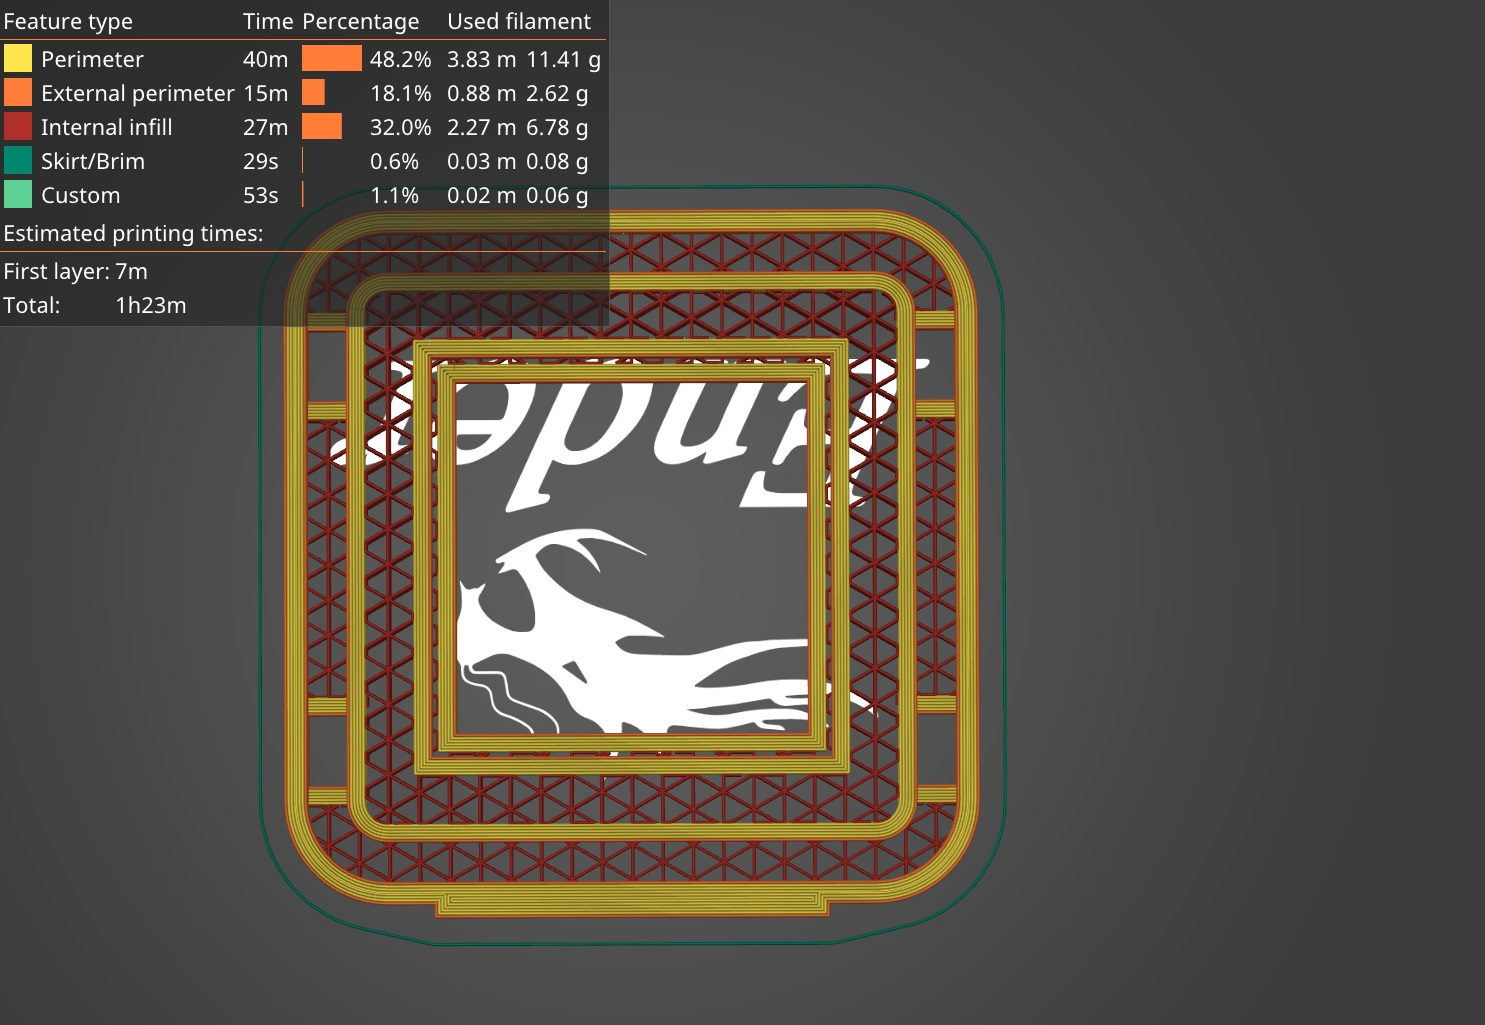
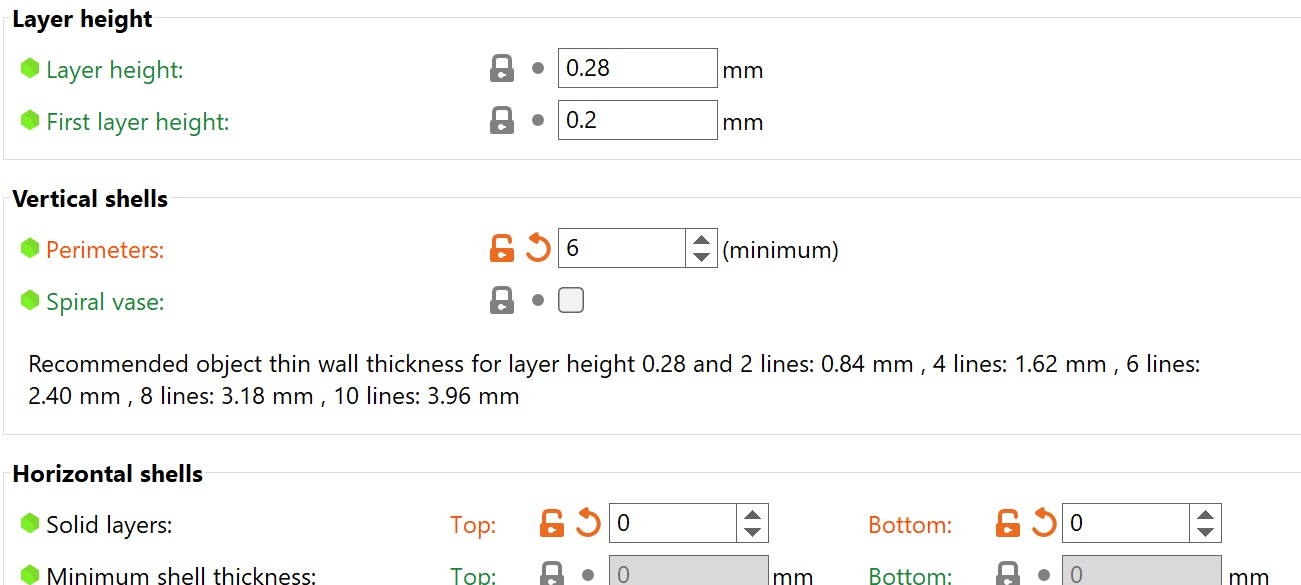

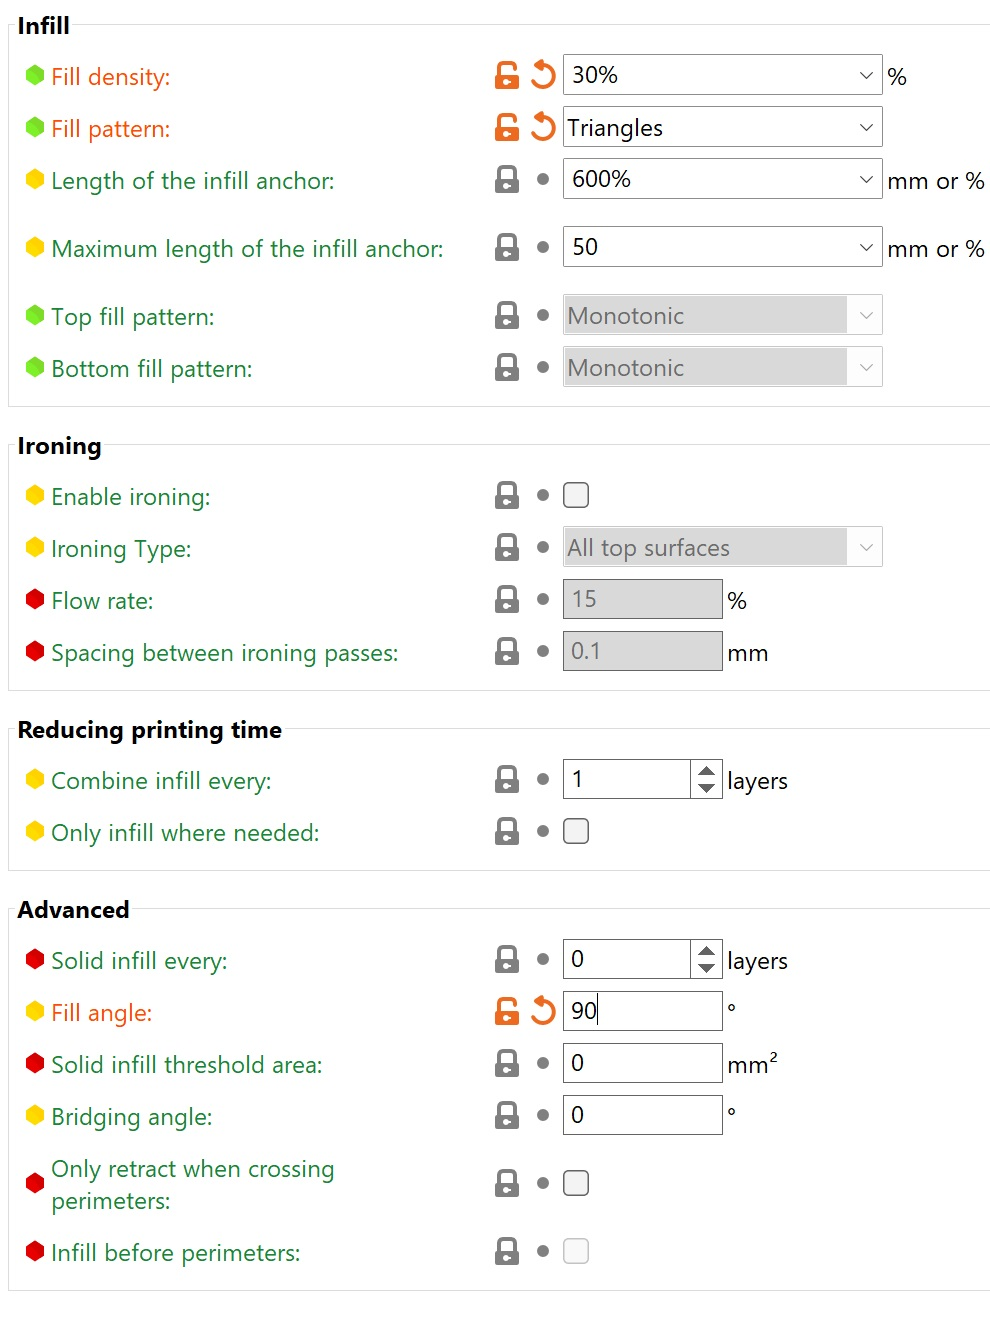

# Lifters and springs

Perimiters: 5

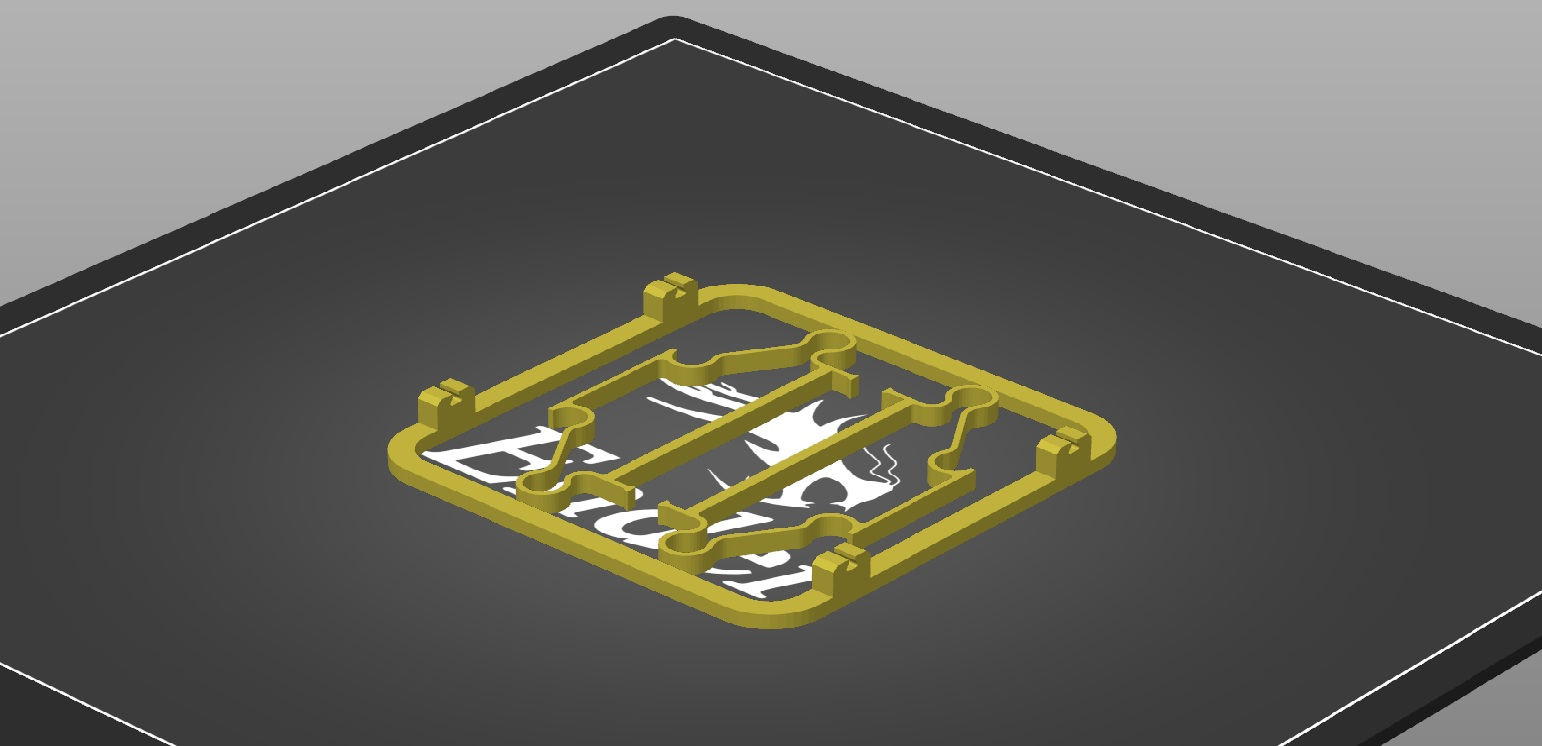

# Pcb holder

Perimiters: 3

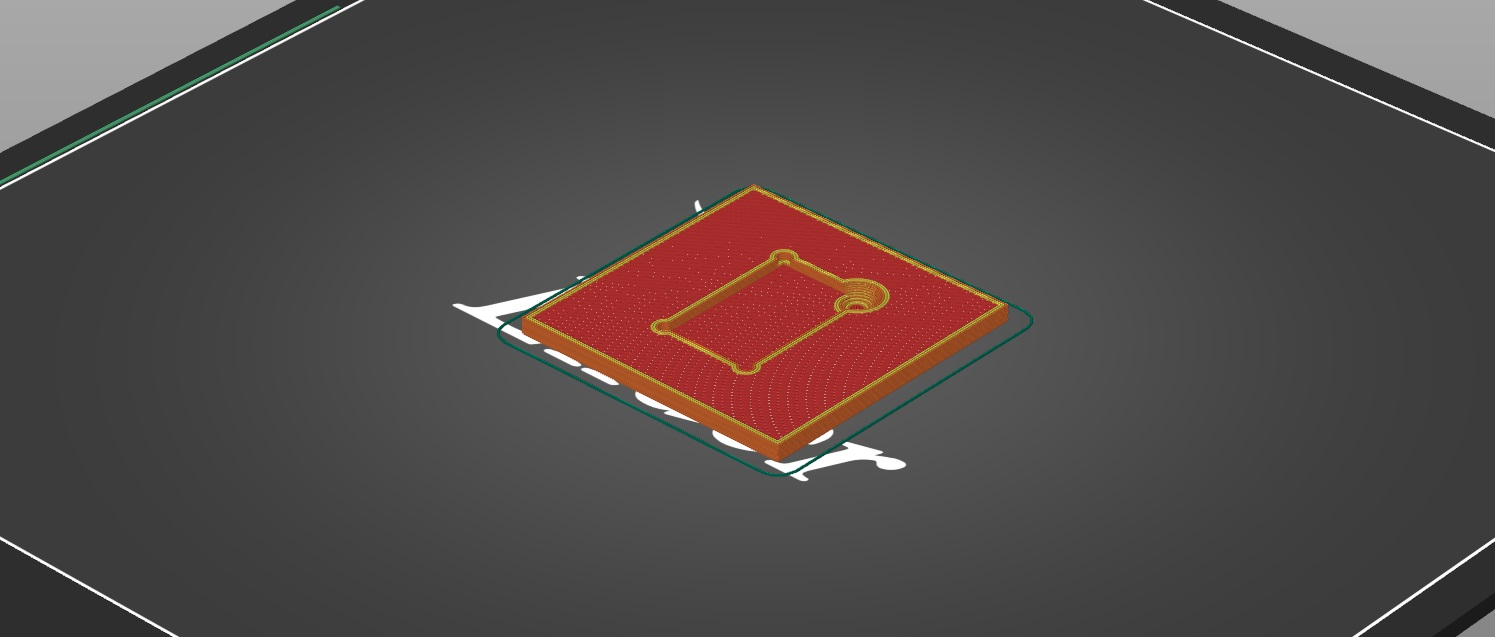

# Vacuum cleaner end piece adapter

Perimiters: 4
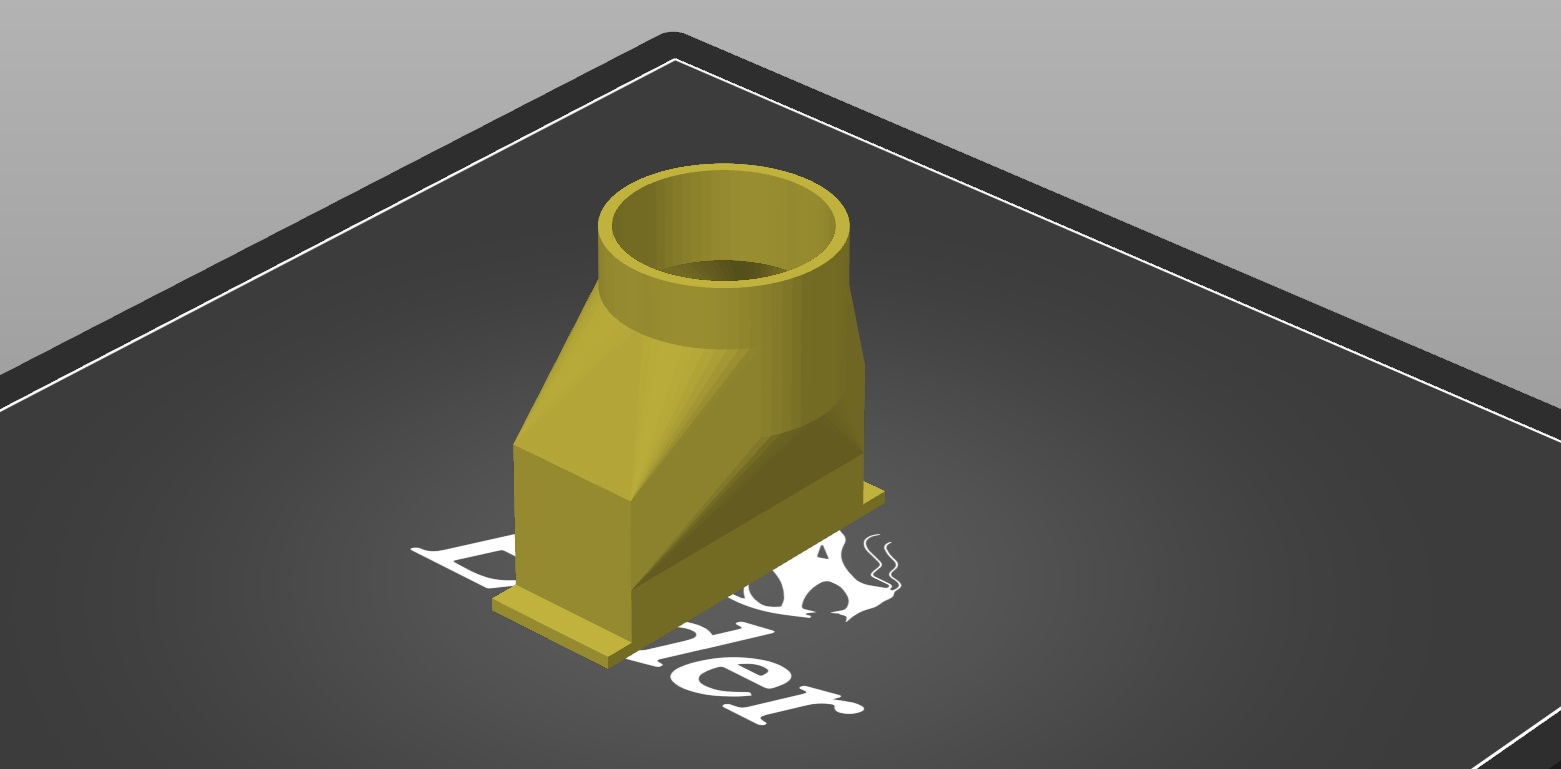

# Help me continue to release public domain work like this by supporting me on Patreon.
# https://www.patreon.com/mariusheier


# Troubleshooting guide



>**PCB holder will not fit inside the top**<br>
>*Sand down the sides*

>**Springs or lifter gets stuck**<br>
>*Sand down the sides of the lifter and or the springs*

>**Springs lift the top**<br>
>*Glue the top to the box, or print springs in softer material like PETG*

>**Solder stencil is bending**<br>
>*Fully compress the springs with your thumbs multiple times. If it doesnt work, reprint spings in softer material like PETG.*

>**Vacuum cleaner or pcb does not fit**<br>
>*Try modifying the clearance values when generating the parts*

>**My solder paste gets sucked sideways, or it does not look good**<br>
>*Use solder with bigger balls*<br>
>*Use less vacuum, if you have a adjustable vacuum cleaner*<br>
>*Tell me on social media to make adjustable valve*<br>

>**I miss the tedious work of carefully taping down pcbs to the table and applying paste with a perfect one pass**<br>
>*Its never to late to go back*

